# EXPLORATORY FACTOR ANALYSIS
## Exploring data
Data: Passenger satisfaction data from Kaggle: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

These data contain survey results with likert scale items, passenger information, and flight information. With factor analysis, we can see if we can bundle some of the survey items together in what we call latent factors.

In [101]:
# import necessary libraries

import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = 'C:/Users/Katia/Documents/Machine learning'
os.chdir(path)

In [102]:
# read csv data 

df = pd.read_csv('passenger_satisfaction_data.csv', sep = ";")

In [103]:
# Check variables
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [104]:
# Check descriptive statistics of continuous variables

df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [105]:
# Check if there are any missing values

df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

The "Arrival Delay in Minutes" has 83 missing values. Due to the robustness of the data, these rows can be dropped.

In [106]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25893 non-null  int64  
 1   Gender                             25893 non-null  object 
 2   Customer Type                      25893 non-null  object 
 3   Age                                25893 non-null  int64  
 4   Type of Travel                     25893 non-null  object 
 5   Class                              25893 non-null  object 
 6   Flight Distance                    25893 non-null  int64  
 7   Inflight wifi service              25893 non-null  int64  
 8   Departure/Arrival time convenient  25893 non-null  int64  
 9   Ease of Online booking             25893 non-null  int64  
 10  Gate location                      25893 non-null  int64  
 11  Food and drink                     25893 non-null  int

Because factor analysis only accepts continuous or ordinal variables, we have to drop the categorical variables such as gender and class. We can also drop id for the purpose of factor analysis.

In [107]:
df = df.drop(['id', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], axis = 1)
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
1,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
2,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
4,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0


In [108]:
df.shape

(25893, 18)

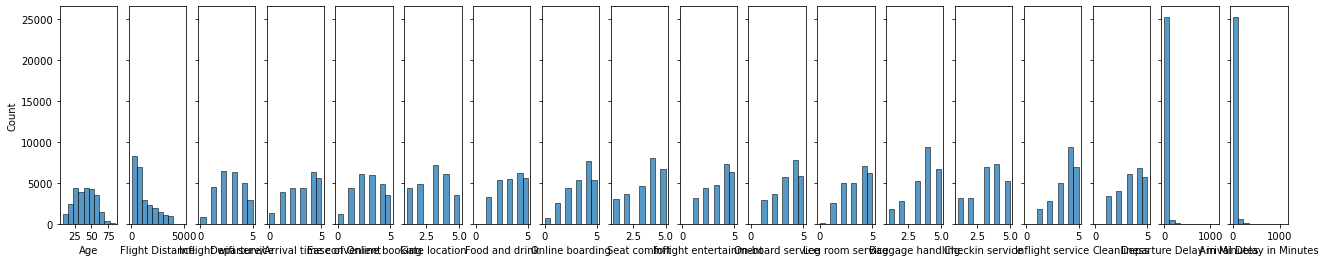

In [109]:
# Exploring distributions with histograms to determine whether pearson or spearman should be used to check for multicollinearity

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18) = plt.subplots(1, 18, sharey=True, figsize = (22,4))

number = 1
for column in df: 
    ax_val = 'ax' + str(number)
    sns.histplot(df[column], bins =10, ax = eval(ax_val))
    number += 1

### Explore variables

We should check for multicollinearity and whether there are any variables with no correlation with other variables (r < .3)

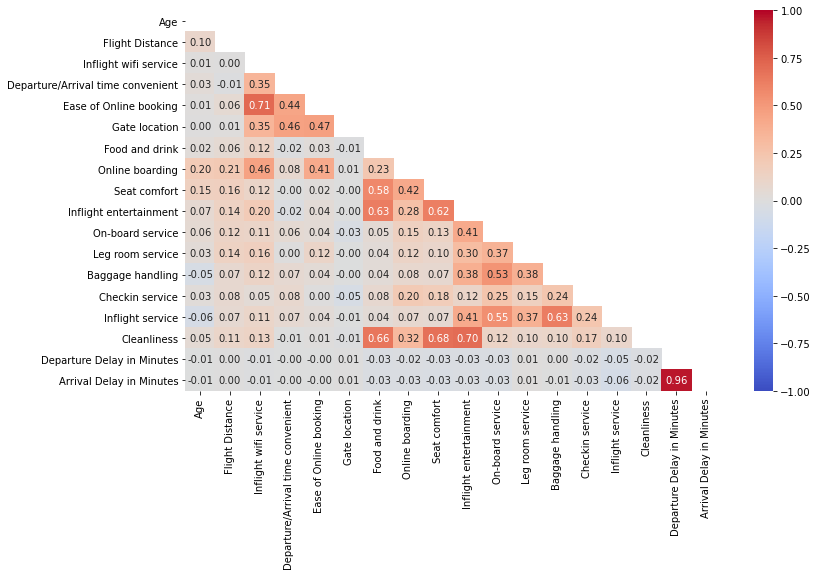

In [110]:
# Generate correlation matrix heat map
plt.figure(figsize = (12, 7))

matrix = np.triu(df.corr(method='spearman'))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

"Age" and "Flight distance" poorly correlate with other variables, whereas "Departure Delay in Minutes" and "Arrival Delay in Minutes" and "Ease of online booking" and "Inflight wifi service" are highly correlated with each other. We should eliminate the first two, and one of the multicollinear variables.

In [111]:
df = df.drop(['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Ease of Online booking'], axis = 1)
df.head()

,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,5,4,4,3,4,3,5,5,5,5,2,5,5,44.0
1,1,1,1,5,4,5,4,4,4,4,3,4,5,0.0
2,2,0,4,2,2,2,2,4,1,3,2,2,2,0.0
3,0,0,2,3,4,4,1,1,1,1,3,1,4,6.0
4,2,3,3,4,1,2,2,2,2,2,4,2,4,20.0


In [112]:
df.shape

(25893, 14)

# Adequacy tests

Run the Bartlett's test of sphericity to check whether the variables are intercorrelated enough. We want a significant p value

In [113]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(127290.23173482067, 0.0)

Run the Kaiser-Meyer-Olkin (KMO) test to check the adequacy of the data. We are looking for a value above 0.6

In [114]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(df)
kmo_model

0.7689710489246714

## Removing outliers

Because the data is mostly from likert scale survey items, it is unlikely that there will be outliers, but we can check for outliers in the 95th quantile, 3 sds above the mean, and in the 99th quantile

In [13]:
# Define outlier function checking for outliers in the 95th quantile, 3 sds above the mean, and in the 99th quantile
def outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for value in data:
        z_score= (value - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(value)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))
    
# function from https://www.linkedin.com/learning/applied-machine-learning-feature-engineering

In [14]:
for variable in df:
    outlier(variable)


Outlier caps for Inflight wifi service:
  --95p: 5.0 / 0 values exceed that
  --3sd: 6.7 / 0 values exceed that
  --99p: 5.0 / 0 values exceed that

Outlier caps for Departure/Arrival time convenient:
  --95p: 5.0 / 0 values exceed that
  --3sd: 7.6 / 0 values exceed that
  --99p: 5.0 / 0 values exceed that

Outlier caps for Gate location:
  --95p: 5.0 / 0 values exceed that
  --3sd: 6.8 / 0 values exceed that
  --99p: 5.0 / 0 values exceed that

Outlier caps for Food and drink:
  --95p: 5.0 / 0 values exceed that
  --3sd: 7.2 / 0 values exceed that
  --99p: 5.0 / 0 values exceed that

Outlier caps for Online boarding:
  --95p: 5.0 / 0 values exceed that
  --3sd: 7.3 / 0 values exceed that
  --99p: 5.0 / 0 values exceed that

Outlier caps for Seat comfort:
  --95p: 5.0 / 0 values exceed that
  --3sd: 7.4 / 0 values exceed that
  --99p: 5.0 / 0 values exceed that

Outlier caps for Inflight entertainment:
  --95p: 5.0 / 0 values exceed that
  --3sd: 7.4 / 0 values exceed that
  --99p: 5

In [115]:
# Remove outliers based on 99 quantile

df['Arrival Delay in Minutes']= df['Arrival Delay in Minutes'].clip(upper=df['Arrival Delay in Minutes'].quantile(.99))


In [116]:
df.describe()

,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
count,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000
mean,2.723709,3.046422,2.976442,3.214923,3.261615,3.448886,3.356969,3.385587,3.349786,3.632681,3.313907,3.648824,3.285521,13.823185
std,1.334711,1.532971,1.281661,1.331895,1.355505,1.320254,1.338643,1.282033,1.319045,1.176220,1.269138,1.180650,1.319355,29.783391
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,172.080000


In [117]:
df.head()

,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,5,4,4,3,4,3,5,5,5,5,2,5,5,44.0
1,1,1,1,5,4,5,4,4,4,4,3,4,5,0.0
2,2,0,4,2,2,2,2,4,1,3,2,2,2,0.0
3,0,0,2,3,4,4,1,1,1,1,3,1,4,6.0
4,2,3,3,4,1,2,2,2,2,2,4,2,4,20.0


In [118]:
# Get a list of variables to add to factor table later

vars = []
for column in df:
    vars.append(column)
print(vars)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Arrival Delay in Minutes']


## Factor Analysis

In [119]:
import sklearn
from sklearn.decomposition import FactorAnalysis

In [120]:

from factor_analyzer import FactorAnalyzer

In [121]:
factor = FactorAnalyzer().fit(df)

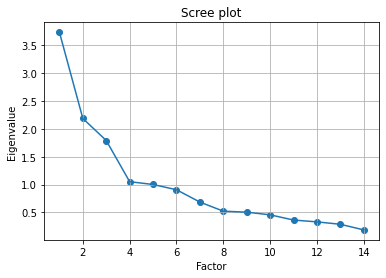

In [122]:
#Get Eigenvalues and plot them
ev, v = factor.get_eigenvalues()
ev

v = range(1, df.shape[1]+1)
plt.scatter(v, ev)
plt.plot(v, ev)
plt.title("Scree plot")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

Four factors seem ideal as suggested by the plot.

In [123]:
# Run analysis

fa = FactorAnalyzer(4, rotation='oblimin') # because the variables are fairly correlated to each other (many above .3), 
                                            # an oblique method is preferred
fa.fit(df)
loads = fa.loadings_
factors = pd.DataFrame.from_records(loads)

# Add variable names to ease interpretability
df2= factors.assign(variables = vars)
df2


,0,1,2,3,variables
0,0.008389,0.085004,0.368301,0.483020,Inflight wifi service
1,-0.047574,0.044543,0.027073,0.622580,Departure/Arrival time convenient
2,0.024944,-0.059973,-0.092349,0.744649,Gate location
3,0.810649,-0.128266,-0.040244,0.018332,Food and drink
4,0.021020,0.003497,0.993687,-0.011128,Online boarding
5,0.733015,-0.067844,0.160213,-0.026199,Seat comfort
6,0.780451,0.341663,-0.044198,0.012900,Inflight entertainment
7,0.013105,0.698980,0.064995,-0.025626,On-board service
8,0.014102,0.483130,0.072588,0.001076,Leg room service
9,-0.013467,0.772438,-0.006944,0.008715,Baggage handling


Highest loadings for 
**factor 0**: food and drink, seat comfort, inflight entertainment, cleaningness - INFLIGHT EXPERIENCE
**factor 1**: inflight entertainment, onboard service, leg room service, baggage handling, inflight service - ROOM and GENERAL SERVICE
**factor 2**: online boarding, inflight wifi service - ONLINE SERVICES
**factor 3**: inflight wifi service, departure/arrival time convenient, gate location, online boarding - A PRIORI EXPERIENCE (mostly)

In [124]:
# Get variance of each factor

variance = fa.get_factor_variance()
df = pd.DataFrame(variance)

# Present results as dataframe 

df.index.names = ['index']
print(df.rename(index={0: 'SS Loadings', 1:"Proportion Variance", 2: 'Cumulative Variance'}))

                            0         1         2         3
index                                                      
SS Loadings          2.554352  2.196101  1.200343  1.179441
Proportion Variance  0.182454  0.156864  0.085739  0.084246
Cumulative Variance  0.182454  0.339318  0.425057  0.509303


The four factors explain 51% of the variance.